In [1]:
#IMPORTING modules & libraries

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Creating data frame
df = pd.read_csv("./diabetes_csv.csv")
df.head(10)

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive
5     5   116    74     0     0  25.6  0.201   30  tested_negative
6     3    78    50    32    88  31.0  0.248   26  tested_positive
7    10   115     0     0     0  35.3  0.134   29  tested_negative
8     2   197    70    45   543  30.5  0.158   53  tested_positive
9     8   125    96     0     0   0.0  0.232   54  tested_positive

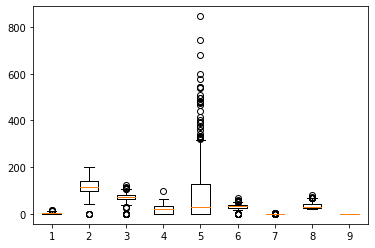

In [ ]:
#Finding the outliers

plt.boxplot(df)
plt.show()

In [ ]:
#Removing the outliers
df = df[df['SkinThickness']<80]
df = df[df['Insulin']<=600]
df.shape
#REMOVED 4 OUTLIERS

(764, 9)

In [ ]:
#Removing 0 from attributes which can't be 0
df.loc[df['Insulin']==0, 'Insulin'] = df['Insulin'].mean()
df.loc[df['Glucose']==0, 'Glucose'] = df['Glucose'].mean()
df.loc[df['BMI']==0, 'BMI'] = df['BMI'].mean()
df.loc[df['BloodPressure']==0, 'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['SkinThickness']==0, 'SkinThickness'] = df['SkinThickness'].mean()

df.to_csv("cleandata.csv")
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin       BMI  \
0            6    148.0      72.000000      35.000000   77.246073  33.60000   
1            1     85.0      66.000000      29.000000   77.246073  26.60000   
2            8    183.0      64.000000      20.390052   77.246073  23.30000   
3            1     89.0      66.000000      23.000000   94.000000  28.10000   
4            0    137.0      40.000000      35.000000  168.000000  43.10000   
5            5    116.0      74.000000      20.390052   77.246073  25.60000   
6            3     78.0      50.000000      32.000000   88.000000  31.00000   
7           10    115.0      69.087696      20.390052   77.246073  35.30000   
8            2    197.0      70.000000      45.000000  543.000000  30.50000   
9            8    125.0      96.000000      20.390052   77.246073  31.95877   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
#Normalizing the data

df = df/df.max()
df.to_csv("normalize.csv")
df.head(10)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.555556  0.128743  0.500745   
1     0.058824  0.427136       0.540984       0.460317  0.128743  0.396423   
2     0.470588  0.919598       0.524590       0.323652  0.128743  0.347243   
3     0.058824  0.447236       0.540984       0.365079  0.156667  0.418778   
4     0.000000  0.688442       0.327869       0.555556  0.280000  0.642325   
5     0.294118  0.582915       0.606557       0.323652  0.128743  0.381520   
6     0.176471  0.391960       0.409836       0.507937  0.146667  0.461997   
7     0.588235  0.577889       0.566293       0.323652  0.128743  0.526080   
8     0.117647  0.989950       0.573770       0.714286  0.905000  0.454545   
9     0.470588  0.628141       0.786885       0.323652  0.128743  0.476286   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.259091  0.617284      1.0  
1                  0.145041  0.382716      0.0  
2                  0.277686  0.395062      1.0  
3                  0.069008  0.259259      0.0  
4                  0.945455  0.407407      1.0  
5                  0.083058  0.370370      0.0  
6                  0.102479  0.320988      1.0  
7                  0.055372  0.358025      0.0  
8                  0.065289  0.654321      1.0  
9                  0.095868  0.666667      1.0

In [4]:
#Preparing the modal
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]#Y is label
print("Y CONTAINS THIS DATA\n\n")
print(Y.head())
print("\n\nX CONTIANS THIS DATA\n\n")
X.head(10)

Y CONTAINS THIS DATA


0    tested_positive
1    tested_negative
2    tested_positive
3    tested_negative
4    tested_positive
Name: class, dtype: object


X CONTIANS THIS DATA




preg  plas  pres  skin  insu  mass   pedi  age
0     6   148    72    35     0  33.6  0.627   50
1     1    85    66    29     0  26.6  0.351   31
2     8   183    64     0     0  23.3  0.672   32
3     1    89    66    23    94  28.1  0.167   21
4     0   137    40    35   168  43.1  2.288   33
5     5   116    74     0     0  25.6  0.201   30
6     3    78    50    32    88  31.0  0.248   26
7    10   115     0     0     0  35.3  0.134   29
8     2   197    70    45   543  30.5  0.158   53
9     8   125    96     0     0   0.0  0.232   54

In [ ]:
#spliting data for training and testing
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)

#testing attributes
X_test

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
360     0.294118  0.949749       0.524590       0.523810  0.541667  0.464978   
262     0.235294  0.477387       0.573770       0.507937  0.128743  0.478390   
754     0.470588  0.773869       0.639344       0.507937  0.128743  0.482861   
194     0.470588  0.427136       0.450820       0.317460  0.128743  0.363636   
336     0.000000  0.587940       0.566293       0.323652  0.128743  0.503726   
..           ...       ...            ...            ...       ...       ...   
10      0.235294  0.552764       0.754098       0.323652  0.128743  0.560358   
197     0.176471  0.537688       0.508197       0.206349  0.080000  0.341282   
446     0.058824  0.502513       0.590164       0.190476  0.116667  0.377049   
169     0.176471  0.557789       0.737705       0.190476  0.130000  0.423249   
695     0.411765  0.713568       0.737705       0.380952  0.800000  0.453055   

     DiabetesPedigreeFunction       Age  
360                  0.240909  0.358025  
262                  0.252893  0.296296  
754                  0.183058  0.555556  
194                  0.056198  0.518519  
336                  0.385124  0.543210  
..                        ...       ...  
10                   0.078926  0.370370  
197                  0.280165  0.283951  
446                  0.271901  0.345679  
169                  0.204545  0.358025  
695                  0.052893  0.530864  

[77 rows x 8 columns]

In [ ]:
#training attributes
X_train

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
423     0.117647  0.577889       0.524590       0.349206  0.128743  0.459016   
617     0.117647  0.341709       0.508197       0.206349  0.025000  0.299553   
269     0.117647  0.733668       0.566293       0.323652  0.128743  0.409836   
649     0.000000  0.537688       0.491803       0.396825  0.128743  0.393443   
66      0.000000  0.547739       0.721311       0.476190  0.128743  0.484352   
..           ...       ...            ...            ...       ...       ...   
72      0.764706  0.633166       0.737705       0.323652  0.128743  0.646796   
107     0.235294  0.723618       0.475410       0.444444  0.233333  0.439642   
273     0.058824  0.356784       0.639344       0.793651  0.075000  0.494784   
438     0.058824  0.487437       0.573770       0.238095  0.128743  0.271237   
103     0.058824  0.407035       0.590164       0.285714  0.066667  0.396423   

     DiabetesPedigreeFunction       Age  
423                  0.173967  0.259259  
617                  0.106198  0.283951  
269                  0.099174  0.345679  
649                  0.054959  0.283951  
66                   0.353306  0.469136  
..                        ...       ...  
72                   0.240909  0.518519  
107                  0.118595  0.456790  
273                  0.174380  0.259259  
438                  0.060744  0.259259  
103                  0.116942  0.296296  

[687 rows x 8 columns]

In [ ]:
#label train and test

print(Y_train,Y_test)

423    0.0
617    0.0
269    1.0
649    0.0
66     1.0
      ... 
72     1.0
107    0.0
273    0.0
438    0.0
103    0.0
Name: Outcome, Length: 687, dtype: float64 360    1.0
262    0.0
754    1.0
194    0.0
336    0.0
      ... 
10     0.0
197    1.0
446    0.0
169    0.0
695    1.0
Name: Outcome, Length: 77, dtype: float64


In [ ]:
#Creating the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,Y_train) # This function will train the model



LogisticRegression()

In [ ]:
#Prediction 

prediction = model.predict(X_test)
c = 1
for i in prediction:
    if(i==1):
        print(c,"\tDIABETIC")
        c = c + 1
    else:
        print(c,"\tNON-DIABETIC")
        c = c + 1

1 	DIABETIC
2 	NON-DIABETIC
3 	DIABETIC
4 	NON-DIABETIC
5 	NON-DIABETIC
6 	NON-DIABETIC
7 	NON-DIABETIC
8 	NON-DIABETIC
9 	NON-DIABETIC
10 	DIABETIC
11 	DIABETIC
12 	NON-DIABETIC
13 	NON-DIABETIC
14 	DIABETIC
15 	DIABETIC
16 	NON-DIABETIC
17 	NON-DIABETIC
18 	NON-DIABETIC
19 	NON-DIABETIC
20 	NON-DIABETIC
21 	NON-DIABETIC
22 	NON-DIABETIC
23 	NON-DIABETIC
24 	DIABETIC
25 	NON-DIABETIC
26 	NON-DIABETIC
27 	NON-DIABETIC
28 	DIABETIC
29 	DIABETIC
30 	DIABETIC
31 	NON-DIABETIC
32 	NON-DIABETIC
33 	NON-DIABETIC
34 	NON-DIABETIC
35 	NON-DIABETIC
36 	NON-DIABETIC
37 	NON-DIABETIC
38 	NON-DIABETIC
39 	NON-DIABETIC
40 	DIABETIC
41 	DIABETIC
42 	NON-DIABETIC
43 	NON-DIABETIC
44 	NON-DIABETIC
45 	NON-DIABETIC
46 	NON-DIABETIC
47 	NON-DIABETIC
48 	NON-DIABETIC
49 	NON-DIABETIC
50 	NON-DIABETIC
51 	NON-DIABETIC
52 	NON-DIABETIC
53 	NON-DIABETIC
54 	NON-DIABETIC
55 	NON-DIABETIC
56 	NON-DIABETIC
57 	NON-DIABETIC
58 	DIABETIC
59 	NON-DIABETIC
60 	NON-DIABETIC
61 	NON-DIABETIC
62 	NON-DIABETIC
63 	NON

In [ ]:
# FINDING MODEL ACCURACY|

accrcy = accuracy_score(Y_test,prediction) #Accuracy of model
print(accrcy)

0.8701298701298701
